In [43]:
import h5py
import numpy as np
from skimage import io, transform
from tqdm import tqdm
import glob
import os

In [3]:
# Image Parameters
height = 224 #256
width  = 224 #256
channels = 3

In [14]:
################################################# Prepare ISIC 2018 data set #################################################
Dataset_add = '/home/staff/azad/deeplearning/datasets/ISIC2018/'
Tr_add = 'ISIC2018_Task1-2_Training_Input'

Tr_list = glob.glob(Dataset_add+ Tr_add+'/*.jpg')
print(f'# of Training samples: {len(Tr_list)}')

# of Training samples: 2594


In [41]:
Data_train_2018    = np.zeros([2594, height, width, channels])
Label_train_2018   = np.zeros([2594, height, width])

print("Reading ISIC 2018 ...\n")
pbar = tqdm(range(len(Tr_list)))
for idx in pbar:
#     print(idx+1)
    pbar.set_description(f"Processing image {idx+1} ({Tr_list[idx].split('/')[-1]})")
    img = io.imread(Tr_list[idx])
    img = np.double(transform.resize(img, 
                                     (height, width, channels),
                                     order=1,
                                     mode='reflect',
                                     anti_aliasing=True))
    Data_train_2018[idx, :,:,:] = img

    b = Tr_list[idx]    
    a = b[0:len(Dataset_add)]
    b = b[len(b)-16: len(b)-4]
    
    add = (a+ 'ISIC2018_Task1_Training_GroundTruth/' + b +'_segmentation.png')    
    img2 = io.imread(add)
    img2 = np.double(transform.resize(img2,
                                     (height, width),
                                     order=1))
    Label_train_2018[idx, :,:] = img2    
         
print('Reading ISIC 2018 finished')

Reading ISIC 2018 ...



Processing image 2594: ['ISIC_0016005', 'jpg']: 100%|██████████| 2594/2594 [1:45:21<00:00,  2.44s/image]  

Reading ISIC 2018 finished


In [45]:
############################################## Make the train and test sets ########################################    
# We consider 1815 samples for training, 259 samples for validation and 520 samples for testing

Train_img      = Data_train_2018[0:1815,:,:,:]
Validation_img = Data_train_2018[1815:1815+259,:,:,:]
Test_img       = Data_train_2018[1815+259:2594,:,:,:]

Train_mask      = Label_train_2018[0:1815,:,:]
Validation_mask = Label_train_2018[1815:1815+259,:,:]
Test_mask       = Label_train_2018[1815+259:2594,:,:]


base = './isic18_224/'
os.makedirs(base, exist_ok=True)

np.save(base+'data_train', Train_img)
np.save(base+'data_test' , Test_img)
np.save(base+'data_val'  , Validation_img)

np.save(base+'mask_train', Train_mask)
np.save(base+'mask_test' , Test_mask)
np.save(base+'mask_val'  , Validation_mask)

In [49]:
import matplotlib.pyplot as plt
%config Inline_Backend.figure_format = "svg"
%matplotlib inline

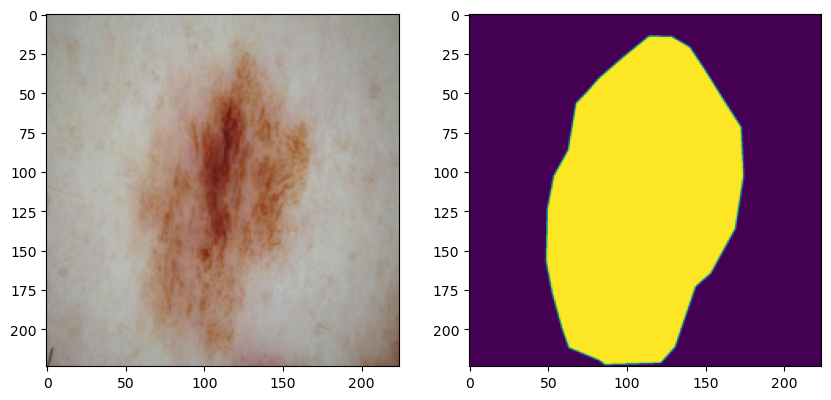

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10,8))
axes[0].imshow(Train_img[0])

axes[1].imshow(Train_mask[0])